A [[1, 67, 4489, 300763, 20151121, 1350125107], [1, 52, 2704, 140608, 7311616, 380204032], [1, 56, 3136, 175616, 9834496, 550731776], [1, 66, 4356, 287496, 18974736, 1252332576], [1, 65, 4225, 274625, 17850625, 1160290625], [1, 80, 6400, 512000, 40960000, 3276800000]]
coef [[4853386.714285706], [-396081.5874553991], [12860.940665881766], [-207.62618661100709], [1.6660452642595465], [-0.005314031206888336]]


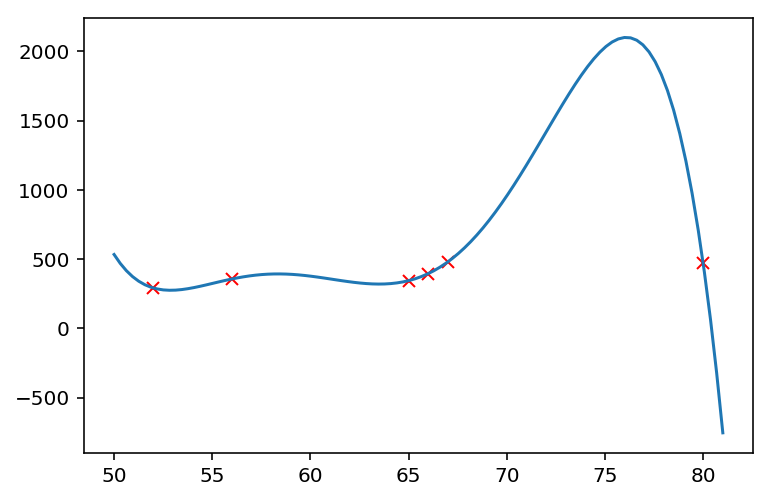

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def createMatriz(m,n,v):
    C = []
    for i in range(m):
        C.append([])
        for j in range(n):
            C[i].append(v)

    return C

def getDimensiones(A):
    return (len(A),len(A[0]))

def sumMatrices(A,B):
    Am,An = getDimensiones(A)
    Bm,Bn = getDimensiones(B)
    if Am != Bm or An != Bn:
        print("Las dimensiones son diferentes")
        return []
    C = createMatriz(Am,An,0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] + B[i][j]
    return C

def restaMatrices(A,B):
    Am,An = getDimensiones(A)
    Bm,Bn = getDimensiones(B)
    if Am != Bm or An != Bn:
        print("Las dimensiones son diferentes")
        return []
    C = createMatriz(Am,An,0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] - B[i][j]
    return C

def mulMatrices(A,B):
    Am,An = getDimensiones(A)
    Bm,Bn = getDimensiones(B)
    if An != Bm:
        print("Las matrices no son conformables")
        return []
    C = createMatriz(Am,Bn,0)
    for i in range(Am):
        for j in range(Bn):
            for k in range(An):
                C[i][j] += A[i][k] * B[k][j]
    return C
def getMenorMatriz(A,r,c):
    m,n = getDimensiones(A)
    C = createMatriz(m-1,n-1,0)
    for i in range(m):
        if i == r:
            continue
        for j in range(n):
            if j == c:
                continue
            Ci = i
            if i > r:
                Ci = i - 1
            Cj = j
            if j > c:
                Cj = j -1
            C[Ci][Cj] = A[i][j]
    return C

def detMatriz(A):
    m,n = getDimensiones(A)
    if m != n:
        print("La matriz no es cuadrada")
        return -1
    if m == 1:
        return m
    if m == 2:
        return  A[0][0]*A[1][1] - A[0][1]*A[1][0]
    det = 0
    for j in range(n):
        det += (-1)**(j)*A[0][j]*detMatriz(getMenorMatriz(A,0,j))
    return det

def getMatrizAdyacente(A):
    m,n = getDimensiones(A)
    C = createMatriz(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = (-1)**(i+j)*detMatriz(getMenorMatriz(A,i,j))
    return C

def getMatrizTranspuesta(A):
    m,n = getDimensiones(A)
    C = createMatriz(n,m,0)
    for i in range(m):
        for j in range(n):
            C[j][i] = A[i][j]
    return C

def getMatrizInversa(A):
    detA = detMatriz(A)
    if detA == 0:
        print("La matriz no tiene inversa")
        return 0
    At =  getMatrizTranspuesta(A)
    adyAt =  getMatrizAdyacente(At)
    m,n = getDimensiones(A)
    C = createMatriz(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = (1/detA)*adyAt[i][j]
    return C
# 77,68,70,59,58,64,72,57,63]
# ,425,346,267,368,295,487,481,374,252]
x = [67,52,56,66,65,80]
y = createMatriz(1,len(x),0)
y[0] = [481,292,357,396,345,469]
C = getMatrizTranspuesta(y)
A = createMatriz(len(x),len(x), 0)
for i in range(len(x)):
    for j in range(len(x)):
        A[i][j] = x[i]**(j)
print("A",A)
invA = getMatrizInversa(A)
coef = mulMatrices(invA,C)
print("coef",coef)

plt.plot(x,C,'rx')

x2 = np.linspace(50, 81, 100)

def evalua(x,coef):
    y = []
    for i in range(len(x)):
        y.append(0)
        for j in range(len(coef)):
            y[i] += coef[j][0] * x[i] **(j)
    return y

y2 = evalua(x2,coef)
plt.plot(x2,y2)
plt.show()